# Wine Clustering

Data diambil dari kaggle 
https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?datasetId=626341&sortBy=voteCount&select=wine-clustering.csv

teknik clustering yang akan digunakan adalah k-means 

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load Data and Explore

In [12]:
df = pd.read_csv("D:/Data For Project/Wine Data/wine-clustering.csv")
df.describe()
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
#cek missing value
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Scale Data

In [16]:
from sklearn import preprocessing

scaled = preprocessing.scale(df)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Use WCSS to determine number of cluster

In [17]:
wcss=[]
cl_num = 10
for i in range (1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\dharm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1175.5045995636674,
 1101.454194045812,
 1046.7546013206904,
 1004.4763846780286,
 946.1768221891003,
 885.595045289367]

### Plot WCSS

Text(0, 0.5, 'WCSS')

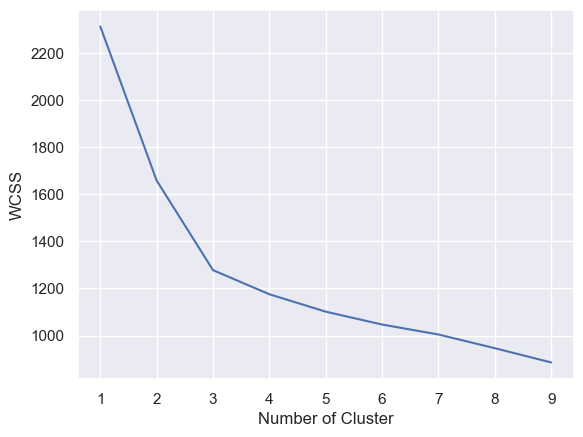

In [18]:
number_cluster = range(1,cl_num)
plt.plot(number_cluster,wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

Dari grafik diatas diambil kesimpulan untuk menggunakan 3 cluster

###  3 Cluster

In [19]:
kmeans_3 = KMeans(3)
kmeans_3.fit(scaled)

KMeans(n_clusters=3)

In [20]:
cluster_3 = df.copy()
cluster_3['cluster_pred']=kmeans_3.fit_predict(scaled)
cluster_3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_pred
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


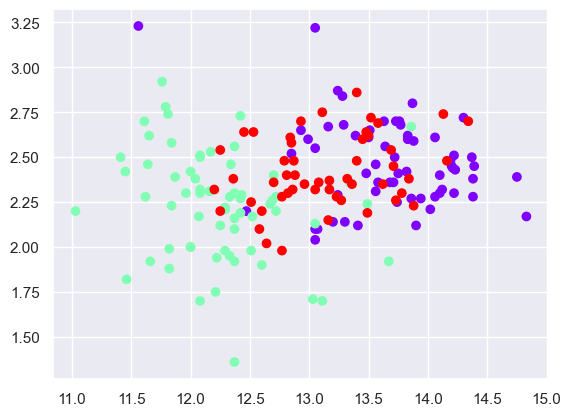

In [22]:
#plot 
plt.scatter(cluster_3['Alcohol'],cluster_3['Ash'], c=cluster_3['cluster_pred'], cmap='rainbow')

In [36]:
#mengambil data original yang sudah memiliki kelas
original = pd.read_csv("C:/Users/dharm/Downloads/wine.data",header=None)
original[0] = original[0].map({1:0,2:1,3:2})
original

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


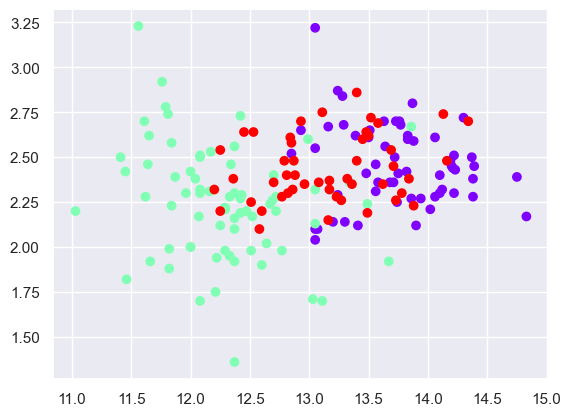

In [37]:
#plot data original berdasar kan kelas 
plt.scatter(original[1],original[3], c=original[0], cmap='rainbow')

In [33]:
from sklearn import metrics

In [38]:
#membandingakn clasifikasi prediksi dan asli
cfm = metrics.confusion_matrix(original[0],cluster_3['cluster_pred'])
cfm

array([[59,  0,  0],
       [ 3, 65,  3],
       [ 0,  0, 48]], dtype=int64)

In [39]:
#mencari nilai akurasi
acc = metrics.accuracy_score(original[0],cluster_3['cluster_pred'])
acc

0.9662921348314607

Model yang dibuat memiliki akurasi sebesar 96.6%